In [36]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

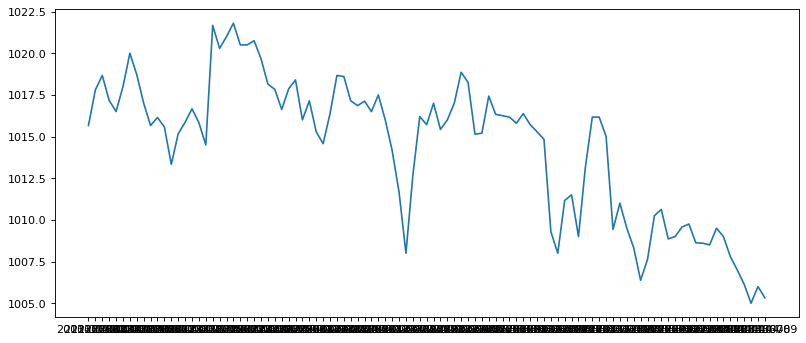

In [26]:
import pandas as pd
data =pd.read_csv('trainsamp.csv')


date = data['date']

data['date']= pd.to_datetime(date) #converting date to datetime format
data.sort_values(by=['date'], inplace=True, ascending=True) #sorting data with respect to date
data.set_index('date',inplace=True)
#date

figure(figsize=(12, 5), dpi=80, linewidth=10)
plt.plot(date, data['meanpressure'])

Missing values imputation  (Interpolation)
1.Linear
2.Spline
3.time based

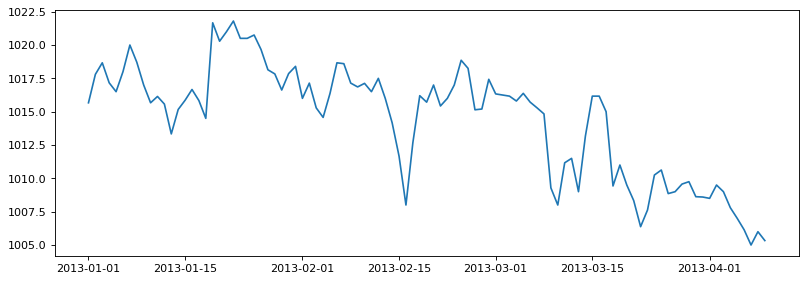

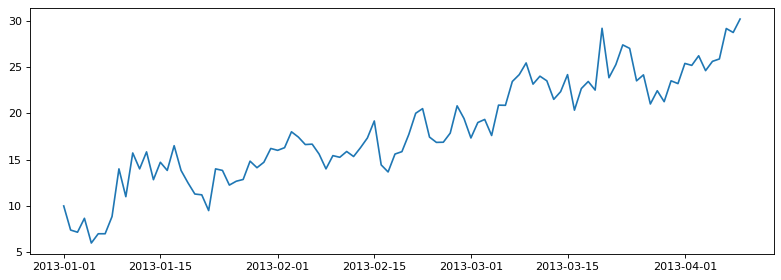

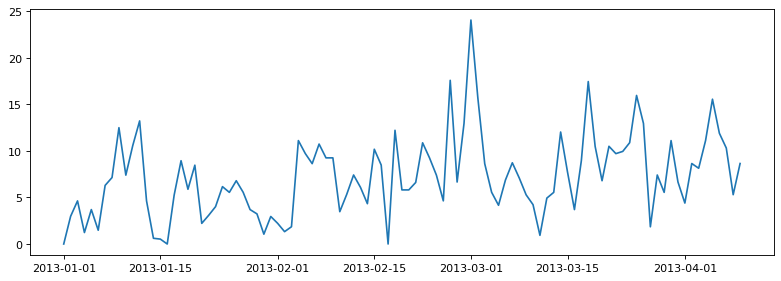

In [35]:
data['linear'] = data['meanpressure'].interpolate(method='linear')
data['spline'] = data['meantemp'].interpolate(method='spline', order=3)
data['new_time'] = data['wind_speed'].interpolate(method='time')
methods = ['linear','spline','new_time']

for method in methods:
    figure(figsize=(12, 4), dpi=80, linewidth=10)
    plt.plot(data.index, data[method])

Denoising
1.Rolling means
2.Fourier Transform

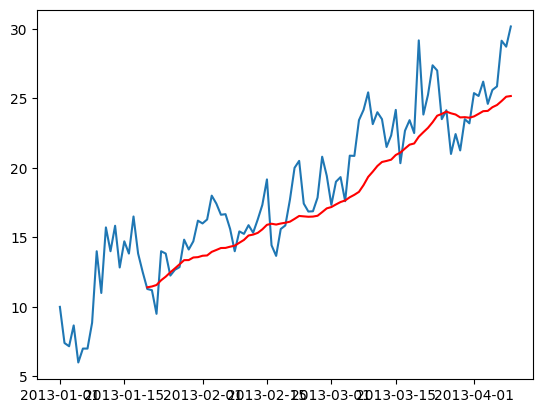

In [22]:
rolling_meantemp = data['meantemp'].rolling(20).mean()
plt.plot(data['date'], data['meantemp'])
plt.plot(data['date'], rolling_meantemp, color= "red")


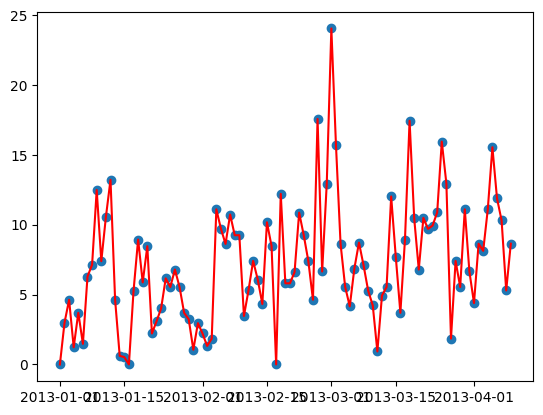

In [43]:
def fft_denoiser(signal, threshold):
    fft_signal = np.fft.fft(signal)
    fft_signal[np.abs(fft_signal) < threshold] = 0
    return np.fft.ifft(fft_signal).real

# Apply FFT denoising
threshold = 1.0  # Adjust threshold as needed
denoised_wind_speed = fft_denoiser(data['wind_speed'], threshold)
plt.plot(data.index, denoised_wind_speed, color='red')
plt.scatter(data.index, data['wind_speed'])

Scaling techniques

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)
# print("Min:", np.min(data_minmax))
# print("Max:", np.max(data_minmax))
# print("Min-Max Scaled Data:")
#print(data_minmax)


# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(data)
# print("Min:", np.min(data_standard))
# print("Max:", np.max(data_standard))
# print("\nStandardized Data:")
#print(data_standard)

Splitting the data

In [56]:
train_size = int(len(data_standard) * 0.8)  # 80% train, 20% test
train_data, test_data = data_standard[:train_size], data_standard[train_size:]

Outlier detection 
Rolling Statistical Bound based approach
Isolation Forest
K-means Clustering


In [61]:
window_size = 10  # Adjust as needed
threshold_multiplier = 3  # Adjust as needed
# Compute rolling mean and standard deviation
rolling_mean = data['wind_speed'].rolling(window=window_size).mean()
rolling_std = data['wind_speed'].rolling(window=window_size).std()

# Calculate upper and lower bounds based on rolling statistics
upper_bound = rolling_mean + threshold_multiplier * rolling_std
lower_bound = rolling_mean - threshold_multiplier * rolling_std

# Identify outliers
outliers = (data['wind_speed'] > upper_bound) | (data['wind_speed'] < lower_bound)

# Handle outliers by replacing them with NaN or a specified value
# For example, replace outliers with NaN:
print(outliers)
data.loc[outliers, 'wind_speed'] = None

#plt.plot(date, data['wind_speed'])

date
2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
              ...  
2013-04-05    False
2013-04-06    False
2013-04-07    False
2013-04-08    False
2013-04-09    False
Name: wind_speed, Length: 99, dtype: bool


In [60]:
from sklearn.ensemble import IsolationForest

# Assuming 'data' is your DataFrame with time series data and ''wind_speed'' is the name of the numerical feature
# Define parameters for Isolation Forest
contamination = 0.05  # Adjust as needed
random_state = 42  # Adjust as needed

# Extract the feature data
X = data[['wind_speed']].values

# Instantiate and fit the Isolation Forest model
model = IsolationForest(contamination=contamination, random_state=random_state)
model.fit(X)

# Predict outliers
outliers = model.predict(X)

# Handle outliers by replacing them with NaN or a specified value
# For example, replace outliers with NaN:
data.loc[outliers == -1, 'wind_speed'] = None

In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming 'data' is your DataFrame with time series data and ''wind_speed'' is the name of the numerical feature
# Define parameters for Isolation Forest
contamination = 0.05  # Adjust as needed
random_state = 42  # Adjust as needed

# Extract the feature data
X = data[['wind_speed']].values

# Instantiate and fit the Isolation Forest model
model = IsolationForest(contamination=contamination, random_state=random_state)
model.fit(X)

# Predict outliers
outliers = model.predict(X)

# Handle outliers by replacing them with NaN or a specified value
# For example, replace outliers with NaN:
data.loc[outliers == -1, 'wind_speed'] = None

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Assuming 'data' is your DataFrame with numerical features
# Define parameters for K-means clustering
n_clusters = 4  # Adjust as needed

# Extract the feature data
X = data.values

# Fit K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances of each data point to its nearest cluster center
distances_to_centers, _ = pairwise_distances_argmin_min(X, cluster_centers)

# Set a threshold for outlier detection
threshold = np.percentile(distances_to_centers, 95)  # Adjust as needed

# Identify outliers
outliers = X[distances_to_centers > threshold]

Lagfeatures

In [ ]:
# Adding lagged values for the target variable
lags = 3  # Number of lagged values to include
for lag in range(1, lags + 1):
    data[f'target_lag{lag}'] = data['meantemp'].shift(lag)

# Drop rows with NaN resulting from shifting
data = data.dropna()

Differencing......
Seasonal_decompostion...